In [1]:
from boson_data_lib import *
from qutip import *
import numpy as np
import scipy.linalg as sl

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns

In [3]:
def get_init_states():
    
    init_rho = []
    fidelity_distances = []
    
    #best_init_rho =  np.array([[ 0.96693975+0.j        , -0.17832301+0.00560344j],
    #                           [-0.17832301-0.00560344j,  0.03306025+0.j        ]])
    
    best_init_rho =  np.array([[ 0.0+0.j,  0.0+0.0j],
                               [ 0.0-0.0j, 1.0+0.0j] ]) # exited state
    
    for i in range(0,20):
        gamma = '2.5133'
        directory = "../DATA/"
        
        file = directory + "State_D" + str(i+1) + '_2CUT_data.h5'
        rho, dt = extract_rho(file, gamma)
        
        init_rho.append(rho[1])
        
        fidelity_distances.append(abs(np.trace(sl.sqrtm(sl.sqrtm(init_rho[i]) @ best_init_rho @ sl.sqrtm(init_rho[i])))))
        
    return init_rho, fidelity_distances



def bloch_vector(rho):
    rho = np.matrix(rho)
    # Pauli matrices
    sigmas = [ [[0, 1], [1, 0]], [[0, -1j], [ 1j, 0]], [[1, 0],[0, -1]]] 
    # Bloch vector of the 2 x 2 density matrix
    bloch_vector = np.array([ np.real(np.trace(np.array(sigma) @ rho)) for sigma in sigmas])
    return bloch_vector

def bloch_init_states(rho, fid_distances, view = [-60,30], palette = 'plasma'):
   
    val = np.array(fid_distances) 
    val -= val.min()
    val /= val.max()
    
    colors = plt.cm.get_cmap(palette)(val)[:,:3]

    b = qutip.Bloch()
    b.view = view
    b.point_marker = ['.']
    b.point_size = [300]
    
    b.point_color = colors
    
    for i in range(20):
        xp, yp, zp = bloch_vector(rho[i]).tolist()
        b.add_points([xp, yp, zp])
    
    b.render()
    
    return b

init_rhos, fid_distances  = get_init_states()

In [4]:
df = pd.read_pickle('../TESTS/dataframe_DMDvsERA_LME_trn4_tst20_2023-Sep-20_at_16-51.pkl')

In [ ]:
def bloch_in_grid(rho, fid_distances, df, palette):

    gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
    
    fig, ax = plt.subplots(8, 1, figsize=(5,20)) #sharex=True, sharey=True,
    
    for i in range(8):

        sns.lineplot(
        ax=ax[i],
        data=df[(df['Gamma']==gammas[i])],
        x="Time", y="Infidelity",
        hue="Distance",
        palette=palette,
        legend=False
        )
        #ax[i].set(yscale="log")
    
    return fig

In [5]:
df

,Rank,Gamma,State,Fidelity_DMD,Fidelity_ERA
0,3,0.0,State_D1,1.0,1.0
1,3,0.0,State_D1,1.0,1.0
2,3,0.0,State_D1,1.0,1.0
3,3,0.0,State_D1,1.0,1.0
4,3,0.0,State_D1,1.0,1.0
...,...,...,...,...,...
745,5,79.477,State_D20,1.0,1.0
746,5,79.477,State_D20,1.0,1.0
747,5,79.477,State_D20,1.0,1.0
748,5,79.477,State_D20,1.0,1.0


ValueError: Could not interpret value `Time` for parameter `x`

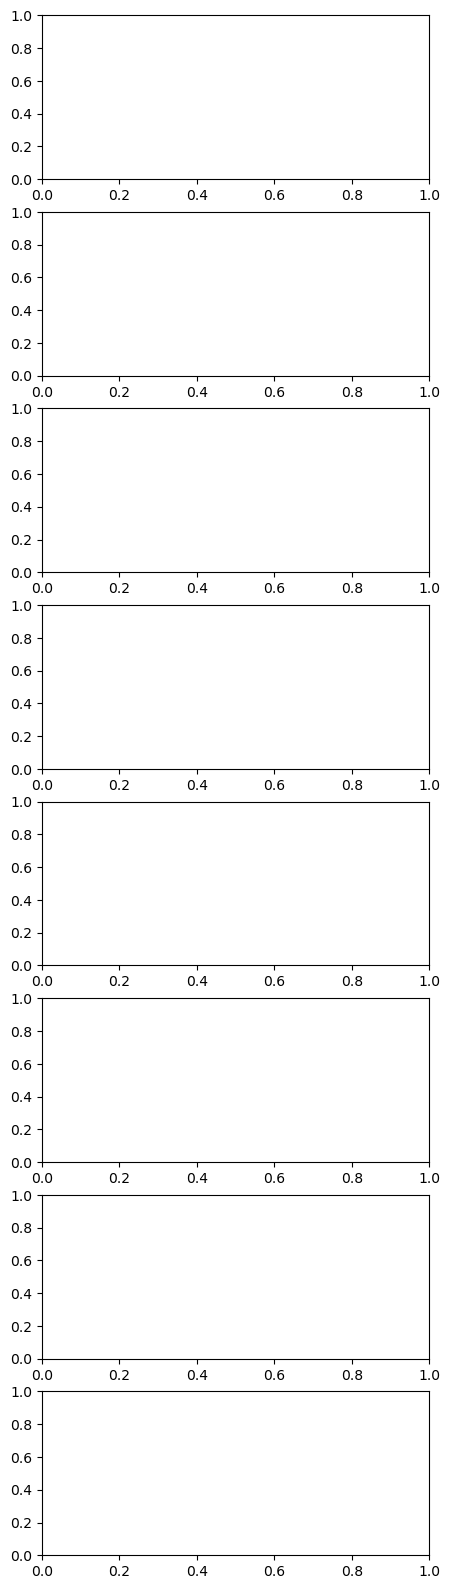

In [8]:
bloch_in_grid(init_rhos, fid_distances, df, palette="plasma")